## Lead Score - Case Study


## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
There are quite a few goals for this case study.

 - Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
 - There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Step 1: Reading and Understanding the Data

In [2]:
#load the dataset
leads_df = pd.read_csv(r'C:\Users\deepa\OneDrive\Desktop\Lead Scoring Assignment_16June\Leads.csv')
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#check the shape of dataframe
leads_df.shape

(9240, 37)

In [4]:
#inspect the dataframe
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#check the statistics of dataframe
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#check null values in each column in dataframe
leads_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Duplicate check

leads_df.loc[leads_df.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
#check the original Conversion Rate
original_Conversion_rate = round((sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100, 2)
print("The conversion rate of leads is ",original_Conversion_rate)

The conversion rate of leads is  38.54


### Observation

- #### The shape of leads dataset is 9240 rows and 37 columns.
- #### There are 7 numerical columns and 30 categorical columns
- #### There are many 'Select' values present in various columns in the dataset. These values correspond to the user having not made any selection.
- #### There are missing/null values in many columns.
- #### There are no duplicate values in the dataset
- #### The conversion rate of leads is 38.54%

## Step 2: Data Cleaning

In [9]:
#Replacing 'Select' with NaN since the customer has not selected any options for these columns while entering the data.
leads_df = leads_df.replace('Select',np.nan)

In [10]:
#Check number of unique values per column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Observation

 - #### As seen from above, there are few columns with only 1 unique value.
    Get updates on DM Content

    Update me on Supply Chain Content

    I agree to pay the amount through cheque

    Receive More Updates About Our Courses

    Magazine

 - #### These columns have only one unique value with no null values so we can drop them as they wont contribute much to the model. 

In [11]:
#drop unique valued columns
leads_df= leads_df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
#drop Prospect ID since they have all unique values

leads_df.drop(['Prospect ID'], axis = 1, inplace = True)

In [13]:
# check for percentage of null values in each column

missing_val_percent = round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)
print(missing_val_percent)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Observation

 - #### There are few columns with high percentage(more than 45%) of missing values 
    
 - #### We will drop these columns where null values are more than 45%


In [14]:
leads_df.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [15]:
# check for percentage of null values in each column after dropping columns having more than 45% null values

round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)


Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Observation

 - #### There are still few columns with high percentage of null values, i.e. above 30%.

 - #### Let us explore these columns individually to take care of null values in each column.

In [16]:
#check City column

leads_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [17]:
leads_df.City.value_counts(normalize=True)

City
Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: proportion, dtype: float64

### Observation

 - #### Around 58% of the data is Mumbai so we can impute the missing values with 'Mumbai' .

In [18]:
leads_df['City'] = leads_df['City'].replace(np.nan,'Mumbai')

In [19]:
leads_df.City.value_counts(normalize=True)

City
Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: proportion, dtype: float64

In [20]:
#check Specialization column
leads_df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [21]:
leads_df.Specialization.value_counts(normalize=True)

Specialization
Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: proportion, dtype: float64

### Observation

- #### There are 36% null values, we will replace those with 'Others' since NaN values have the highest percentage of values.

- #### Lead may not have mentioned specialization because it was not in the list or maybe they don't have a specialization yet. 

In [22]:
leads_df['Specialization'] = leads_df['Specialization'].replace(np.nan,'Others')

In [23]:
leads_df.Specialization.value_counts(normalize=True)

Specialization
Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: proportion, dtype: float64

In [24]:
#Check Tags column
leads_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [25]:
leads_df.Tags.value_counts(normalize=True)

Tags
Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in 

### Observation

 - #### Tags column contains 36% data with tag -"Will revert after reading the email" and 36% null values
 
 - #### These tags are added by sales team of X Education and may vary with time since its added based on the understanding of the sales team.Hence not much reliable and we can drop this column

In [26]:
#drop Tags column
leads_df = leads_df.drop('Tags', axis=1)

In [27]:
#check 'What matters most to you in choosing a course' column
leads_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [28]:
leads_df['What matters most to you in choosing a course'].value_counts(normalize=True)

What matters most to you in choosing a course
Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: proportion, dtype: float64

### Observation

- #### This column is heavily skewed towards better career prospects.Hence we can drop this column since almost all candidates that take this course are looking to have a better career.

In [29]:
#drop 'What matters most to you in choosing a course' column
leads_df = leads_df.drop('What matters most to you in choosing a course', axis=1)

In [30]:
#check 'What is your current occupation' column
leads_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [31]:
leads_df['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: proportion, dtype: float64

### Observation

 - #### Around 85% of the data is Unemployed so we can impute the missing values with 'Unemployed' .

In [32]:
leads_df['What is your current occupation'] = leads_df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
leads_df['What is your current occupation'].value_counts(normalize=True)

What is your current occupation
Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: proportion, dtype: float64

In [34]:
#check country column
leads_df['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [35]:
leads_df['Country'].value_counts(normalize=True)

Country
India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vi

### Observation

 - #### Around 96% of the data is India and 27% data is missing . Hence dropping this column wont impact the model

In [36]:
#drop country column
leads_df = leads_df.drop('Country', axis=1)

In [37]:
# check for percentage of null values in each column 
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)


Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [38]:
# Now missing values are under 2% so we can drop them.
leads_df.dropna(inplace = True)

In [39]:
# check for percentage of null values in each column 
round(100*(leads_df.isnull().sum()/len(leads_df.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Step 3: Univariate Analysis and Bi-variate Analysis 

 - ### <u> Lead Origin

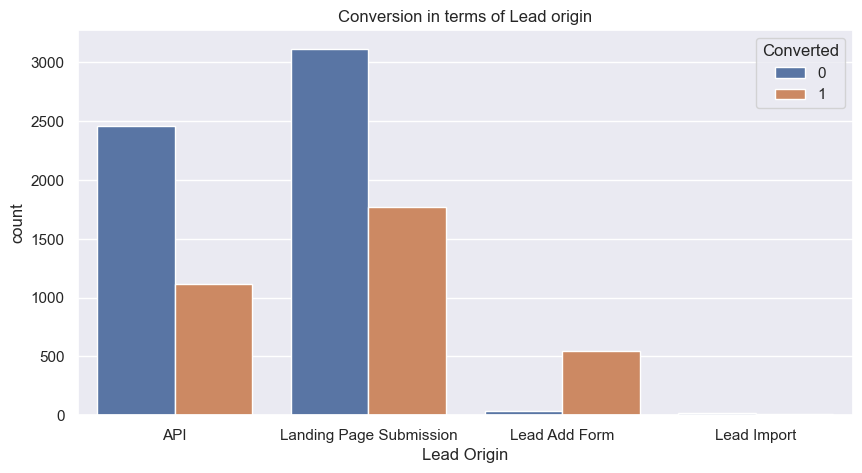

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [41]:
#def function conversion summary
def conversion_summary(df,col):
    convert=df.pivot_table(values='Lead Number',index=col ,columns='Converted', aggfunc='count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending=False,by="Conversion(%)"))

In [42]:
conversion_summary(leads_df,"Lead Origin")

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


### Observation
#### From the above plot and Lead origin conversion summary, we can infer that:

- #### Lead Add Form has the highest conversion rate at 94%
- #### API and Landing Page Submission have 31% and 36% conversion rate but they generate maximum leads counts.
- #### Lead Import has the least amount of conversions and leads count.
- #### To improve overall lead conversion rate, focus should be on improving lead conversion rate of API and Landing Page Submission. Also,generate more leads from Lead Add form since they have a very good conversion rate


 - ### <u> Lead Source

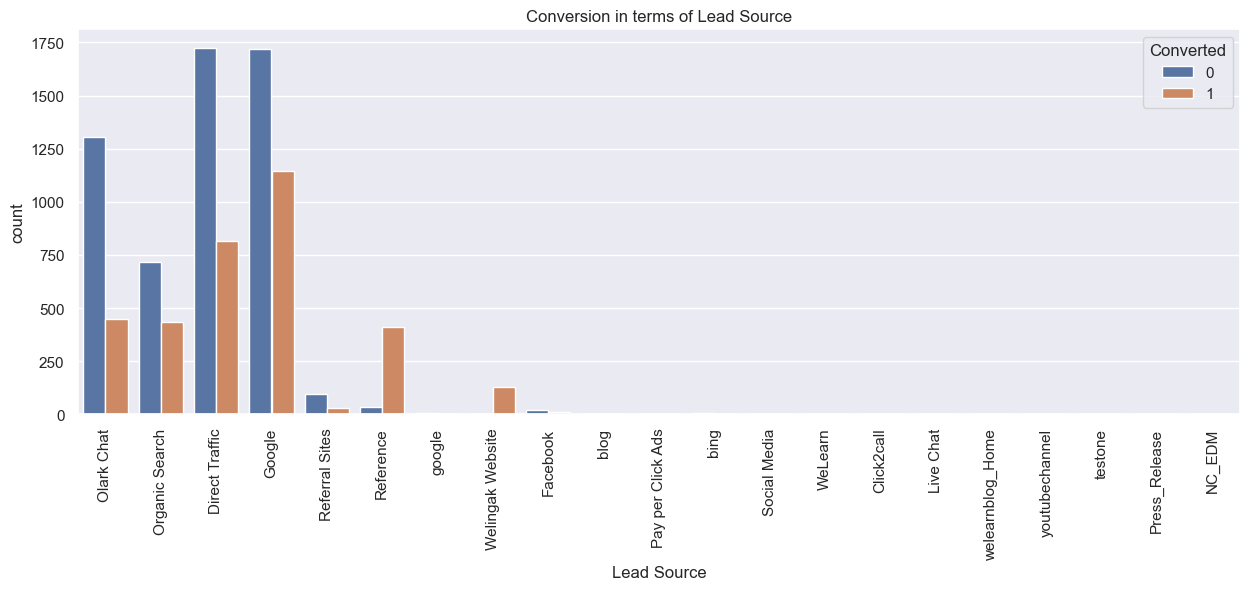

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

### Observation

 - #### Few Lead sources have very low count.Hence we can merge them into common category 'Others'
 - #### Also , there are 2 categories with same name Google and google.Hence replace google with Google to have a single category



In [44]:
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['google'], 'Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

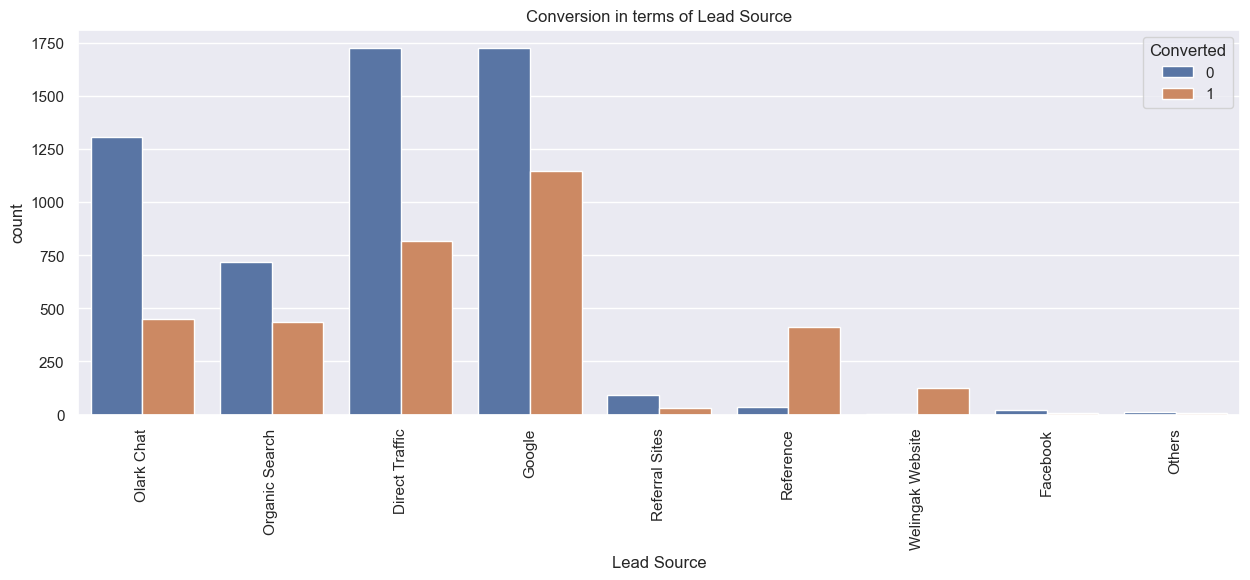

In [45]:
#generate the barplot again to check the distribution
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_df)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [46]:
conversion_summary(leads_df,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


### Observations

#### From the above plot and Lead origin conversion summary, we can infer that:

 - #### Google and direct traffic generates maximum number of leads but has conversion rate of 40% and 32%.
 - #### Welingak website and References has highest conversion rates around 98% and 93% but generates less number of leads.
 - #### olark chat and organic search generates significant number of leads but their conversion rate is around 26% and 38%.
 - #### Lead source in 'others' category such as Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release','Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel' generates very less leads.
 - #### To improve overall lead conversion rate, focus should be on improving lead conversion of olark chat, organic search, direct traffic and google lead source .Also , generate more leads from reference and welingak website since they have a very good conversion rate
 

 - ### <u> Do Not Email & Do Not Call
    


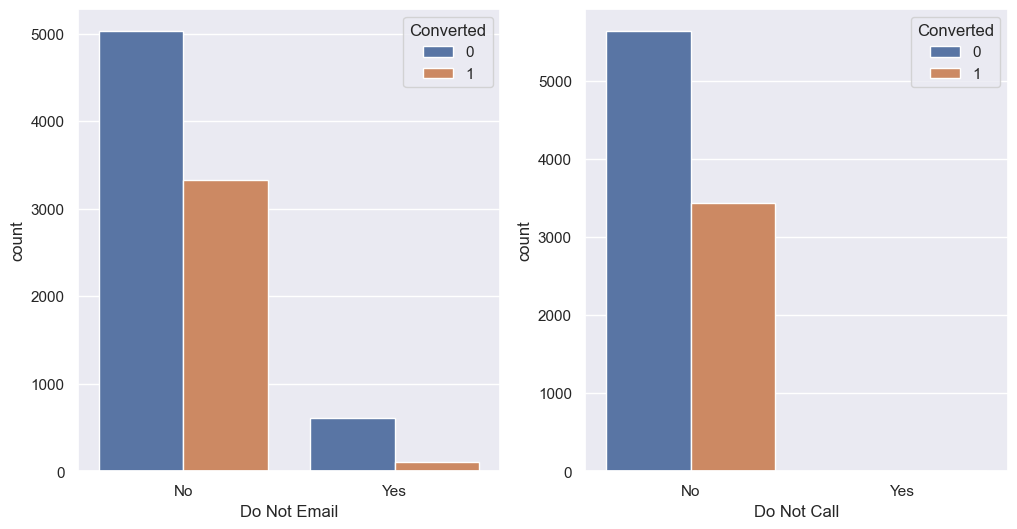

In [47]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_df, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_df, ax = axs[1])
plt.show()


In [48]:
conversion_summary(leads_df,"Do Not Email")


Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


In [49]:
conversion_summary(leads_df,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


### Observations

#### From the above plot and conversion summary, we can infer that:

 - #### Around 99% of customers do not like to be called or receive emails about the course.


 - ### <u> Total Visits

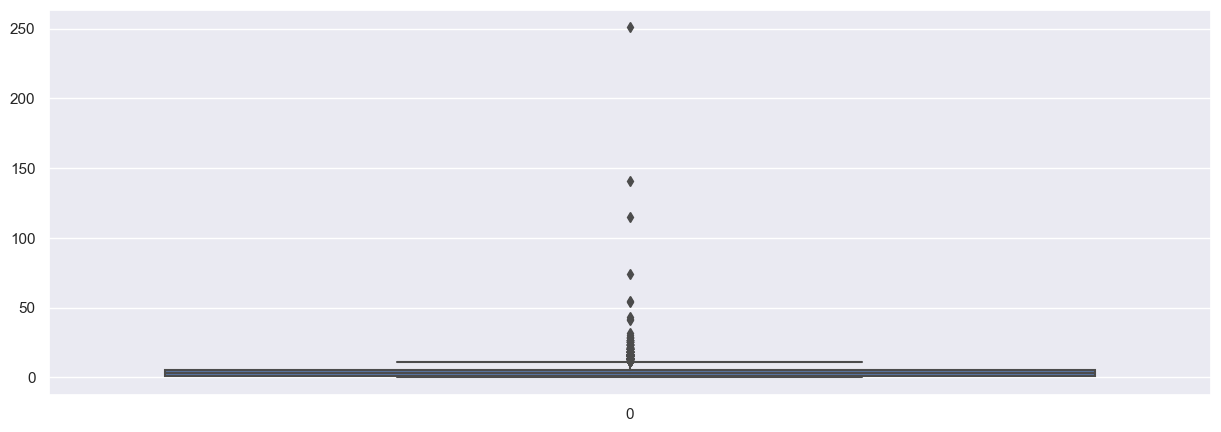

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

### Observations

#### There are a number of outliers in Total Visits column.We will cap the outliers to 95% .


In [51]:
percentiles = leads_df['TotalVisits'].quantile([0.05,0.95]).values
leads_df['TotalVisits'][leads_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_df['TotalVisits'][leads_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

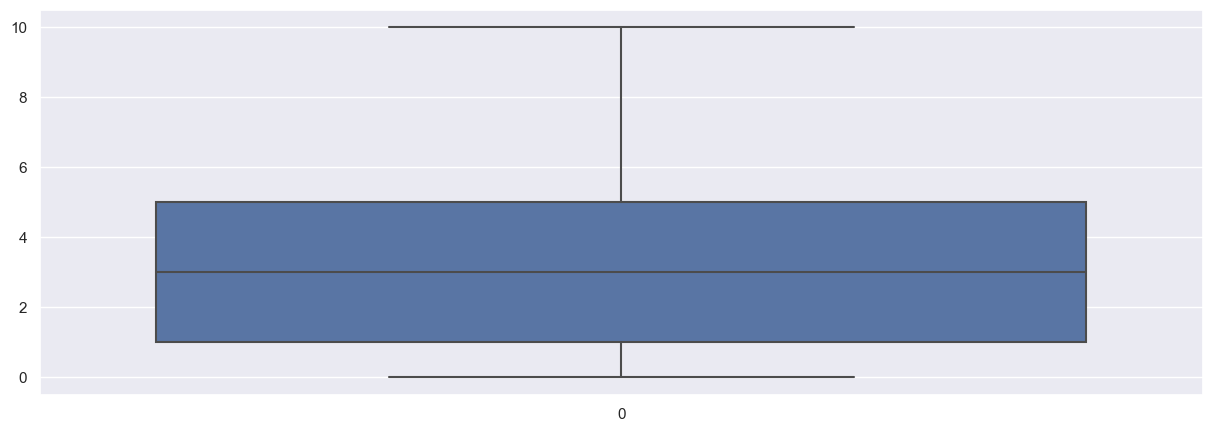

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_df['TotalVisits'])
plt.show()

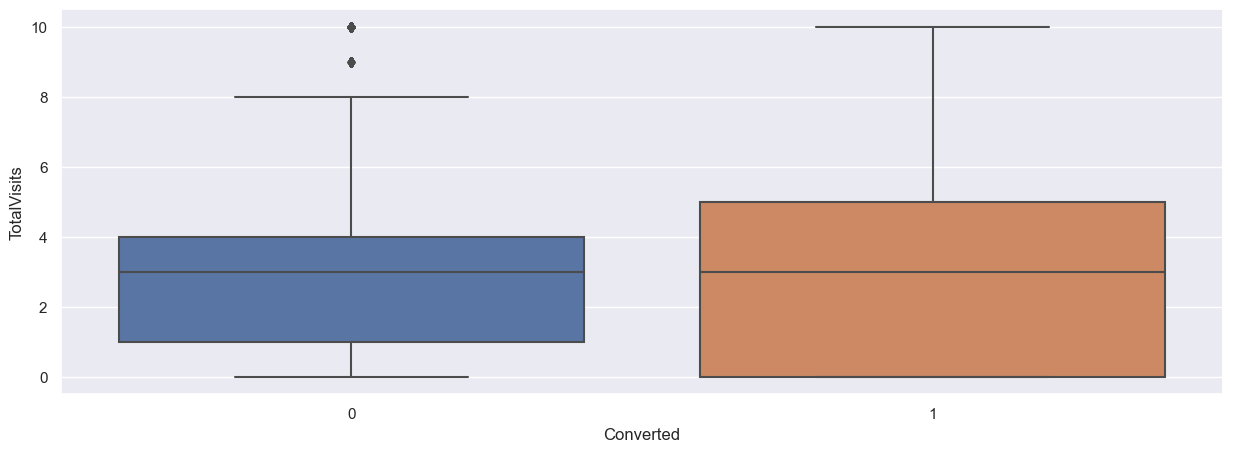

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_df)
plt.show()

### Observations
#### From the above boxplot, we can conclude that:

 - #### Median for converted and non-converted leads are same.
 
 - #### People who visits the platform have equal chances(50-50) of applying and not applying for the course.


 - ### <u> Total time spent on website

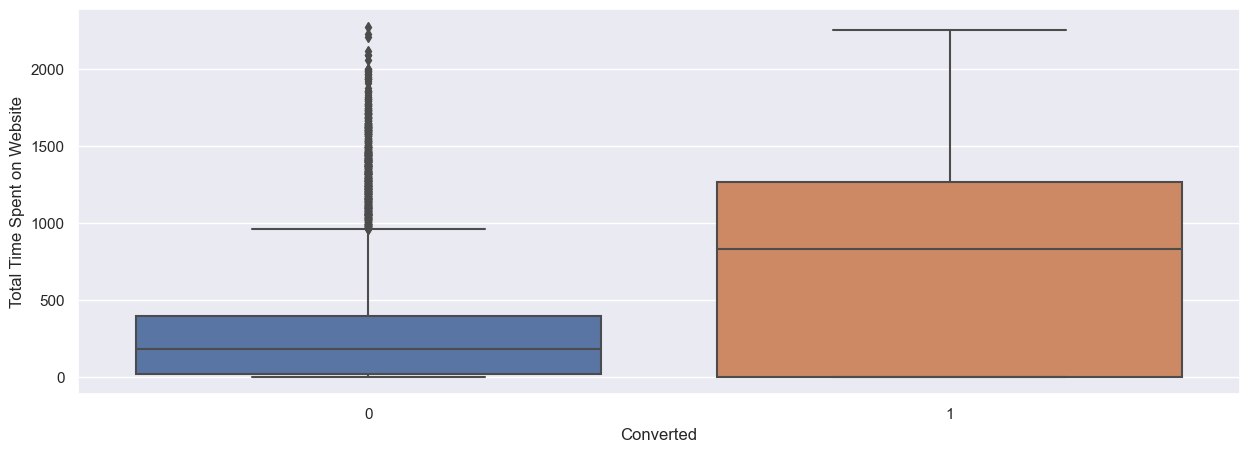

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_df)
plt.show()

### Observations
#### From the above boxplot, we can conclude that:

 - #### People spending more time on website have more chances of opting for a course
 
 - #### People who spend less time on the website didn't opt for any courses.


 - ### <u> Page views per visit

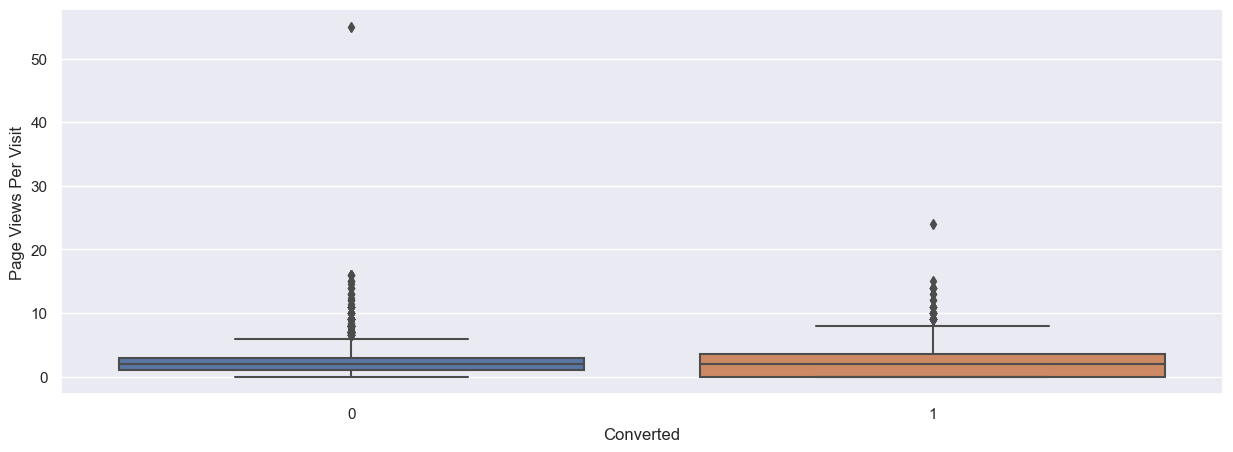

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

### Observations

#### There are a number of outliers in Page views Per Visit column.We will cap the outliers to 95% .


In [56]:
percentiles = leads_df['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_df['Page Views Per Visit'][leads_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

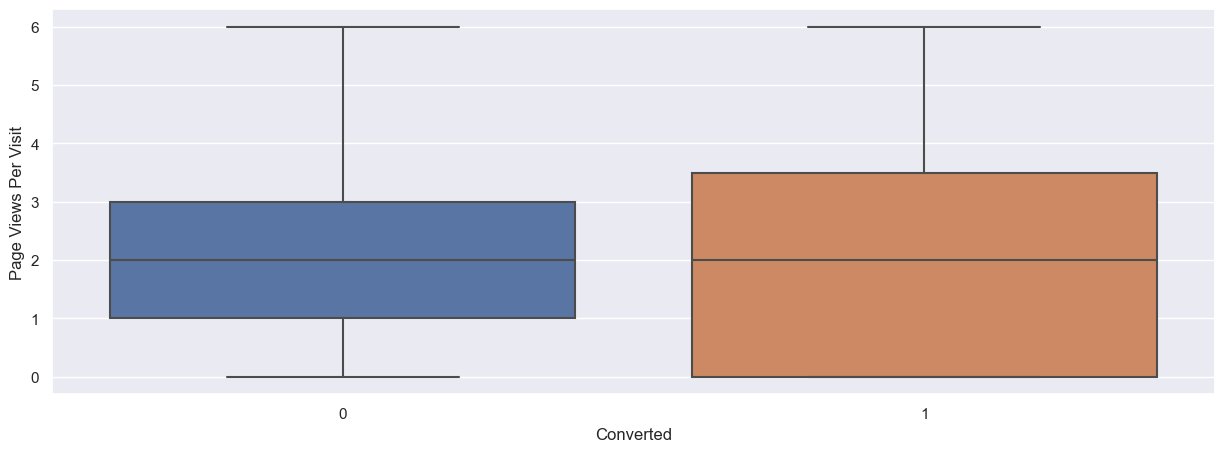

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_df)
plt.show()

### Observations
#### From the above boxplot, we can conclude that:

 - #### Median for converted and non-converted leads are same.
 
 - #### People who visits 1 to 3 average number of pages on website have equal chances(50-50) of applying and not applying for the course.
    
 - #### People who dont visit any pages have higher conversion chances    

 - ### <u> Last Activity

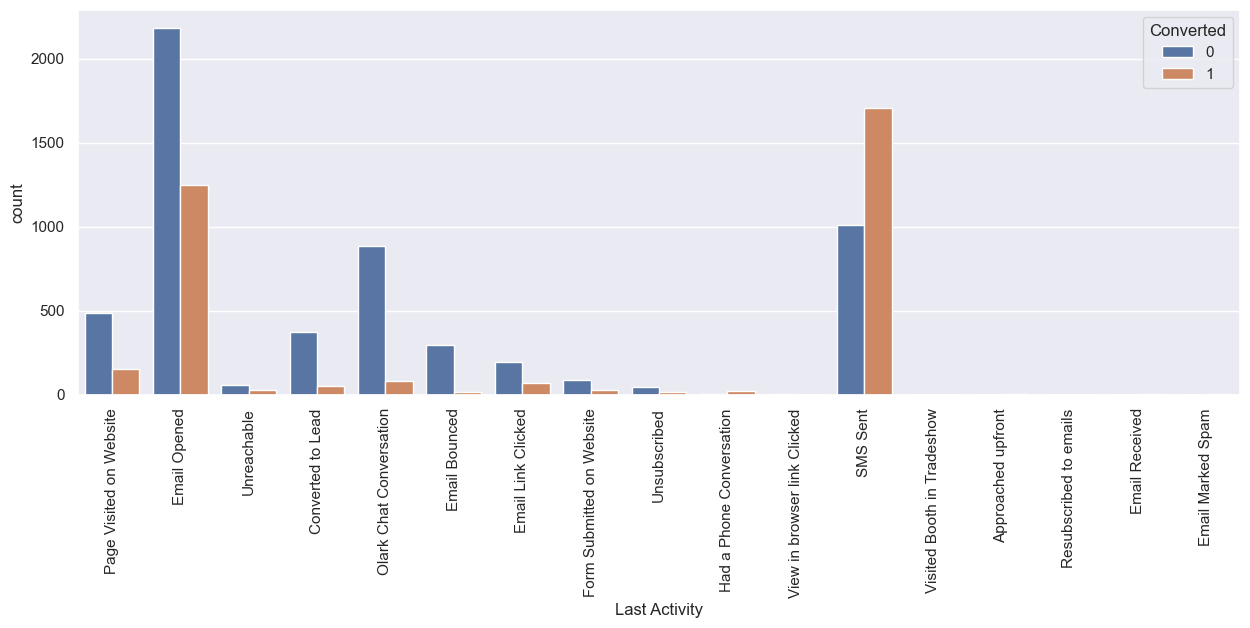

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

In [59]:
conversion_summary(leads_df,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

### Observation
#### Based on the above boxplot, we can infer that:

 - #### Maximum leads are generated from people with last activity - Email opened and SMS sent.

 - #### Conversion rate is around 63% and 36% .

 - #### Least leads are generated from people with last activity - Approached upfront,Email Marked Spam,Resubscribed to emails ,emails received,View in browser link Clicked,Visited Booth in Tradeshow  
 
 - #### olark chat conversation and Page Visited on Website generates significant number of leads but their conversion rate is around 9% and 24%.

 - #### To improve overall lead conversion rate, focus should be on improving lead conversion of people with last activity -olark chat conversation,SMS sent and Page Visited on Website .
 


 - ### <u> Specialization

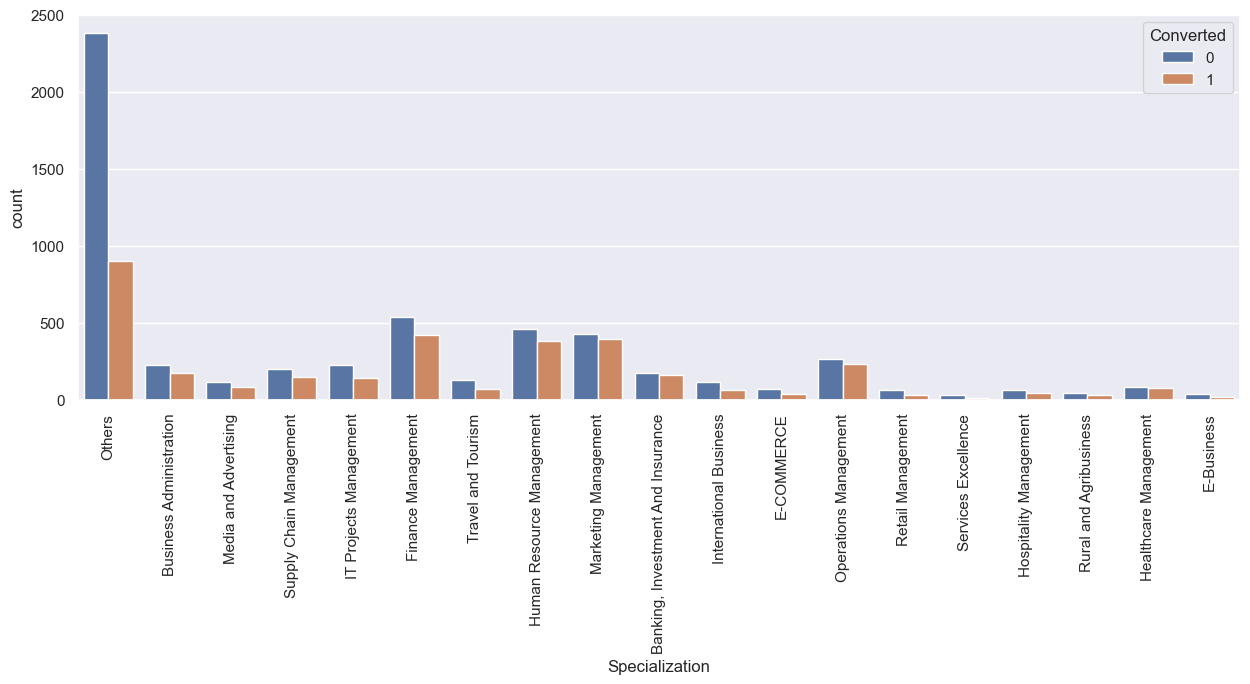

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

In [61]:
conversion_summary(leads_df,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Finance Management                  537  422           44.0
Business Administration             224  175           44.0
Supply Chain Management             198  148           43.0
Rural and Agribusiness               42   31           42.0
Media and Advertising               118   84           42.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   62           35.0
E-COMMERCE                           72 

### Observations

#### From the above plot and conversion summary, we can infer that:

 - #### Most of the specialization have around 40-50% conversion rate.


 - ### <u> Occupation

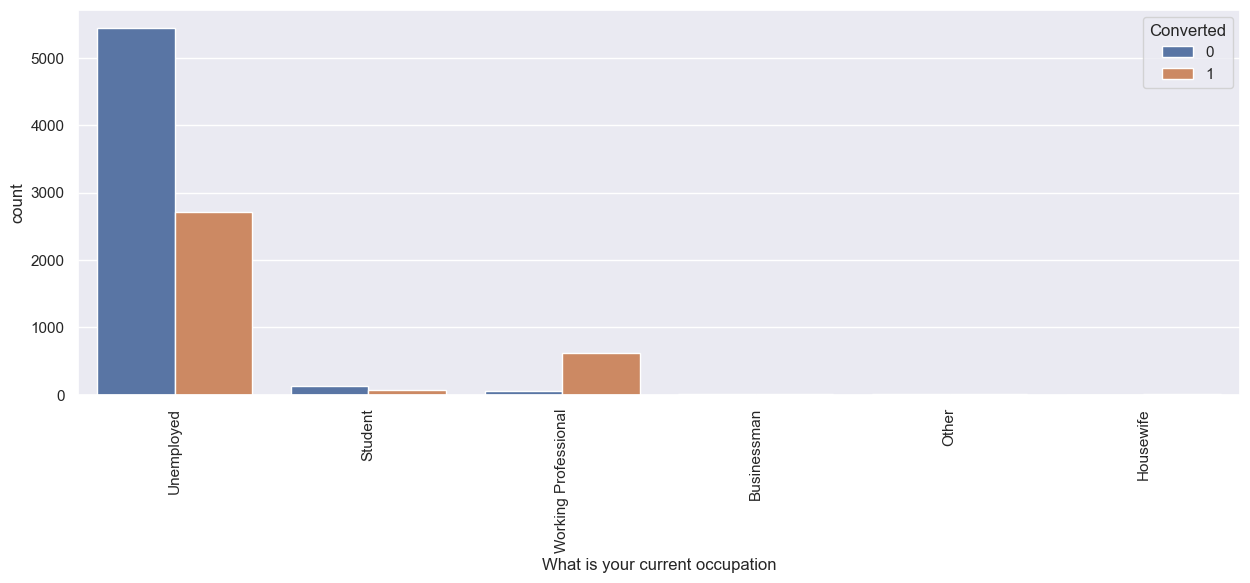

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

In [63]:
conversion_summary(leads_df,"What is your current occupation")

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0     9.0          100.0
Working Professional               55.0   622.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0     9.0           60.0
Student                           132.0    74.0           36.0
Unemployed                       5443.0  2716.0           33.0


### Observations

#### From the above plot and conversion summary, we can infer that:

 - #### Working Professionals and Unemployed people generates maximum leads .
 
 - #### Conversion rate for Working Professionals is high around 92% and  Conversion rate for Unemployed is around 33%
 
 - #### To improve overall lead conversion rate, focus should be on improving lead conversion of unemployed .Also , generate more leads from Working Professionals.
 


 - ### <u> Search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement ,Through Recommendations

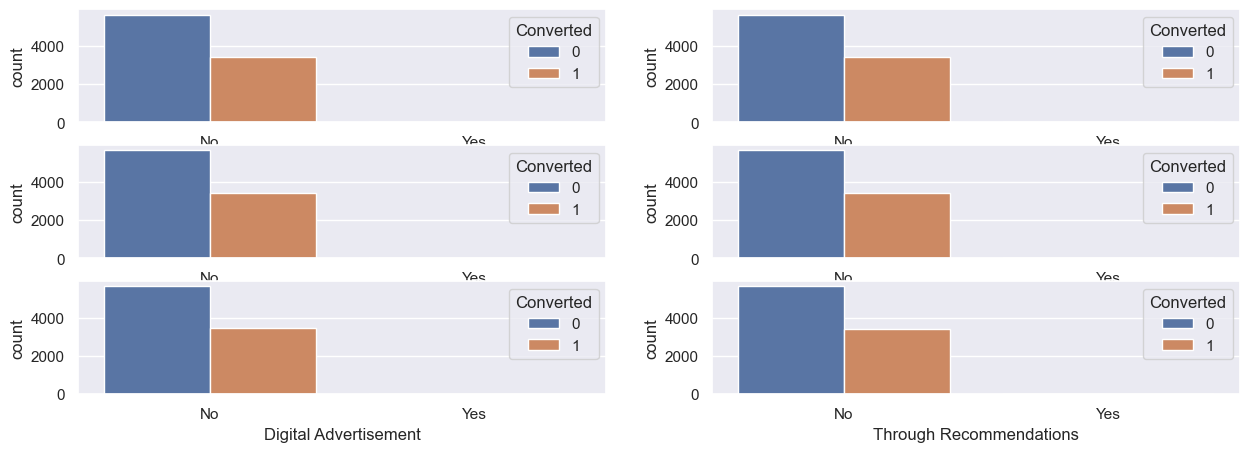

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads_df)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_df)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_df)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_df)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_df)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_df)

plt.show()

### Observation

#### Almost 99% customers have not seen the X education ad in search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement  or Through Recommendations

 - ### <u> City

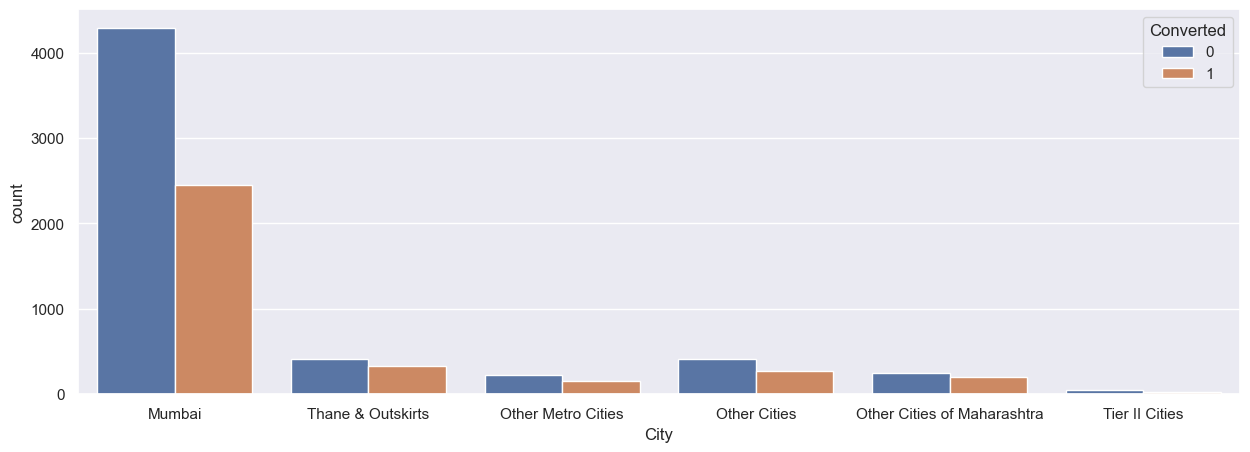

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads_df)

plt.show()

In [66]:
conversion_summary(leads_df,"City")

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Mumbai                       4296  2456           36.0
Tier II Cities                 49    25           34.0


### Observation

#### Maximum leads are generated from Mumbai city with conversion rate of around 36% .Hence focus should me more on increasing conversion rate of Mumbai city

 - ### <u> A free copy of Mastering The Interview

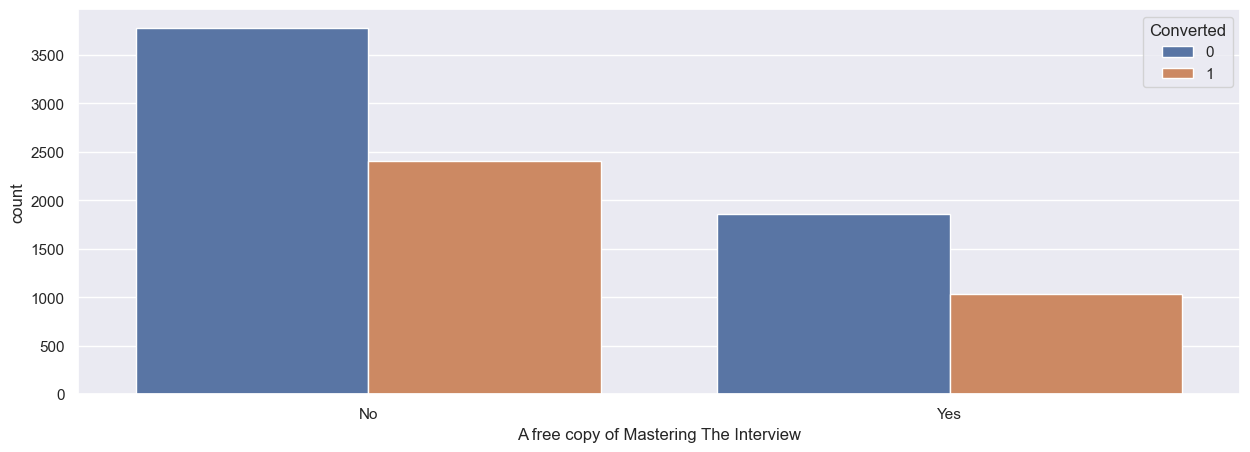

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_df)

plt.show()

In [68]:
conversion_summary(leads_df,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3781  2405           39.0
Yes                                     1858  1030           36.0


### Observation

 - #### Most of the customers didnt want the free copy  of Mastering The Interview.
    
 - #### Customers who opted for free copy had conversion rate of 36% while the ones who didnt opt had conversion rate of 39%
    
   

 - ### <u> Last Notable Activity

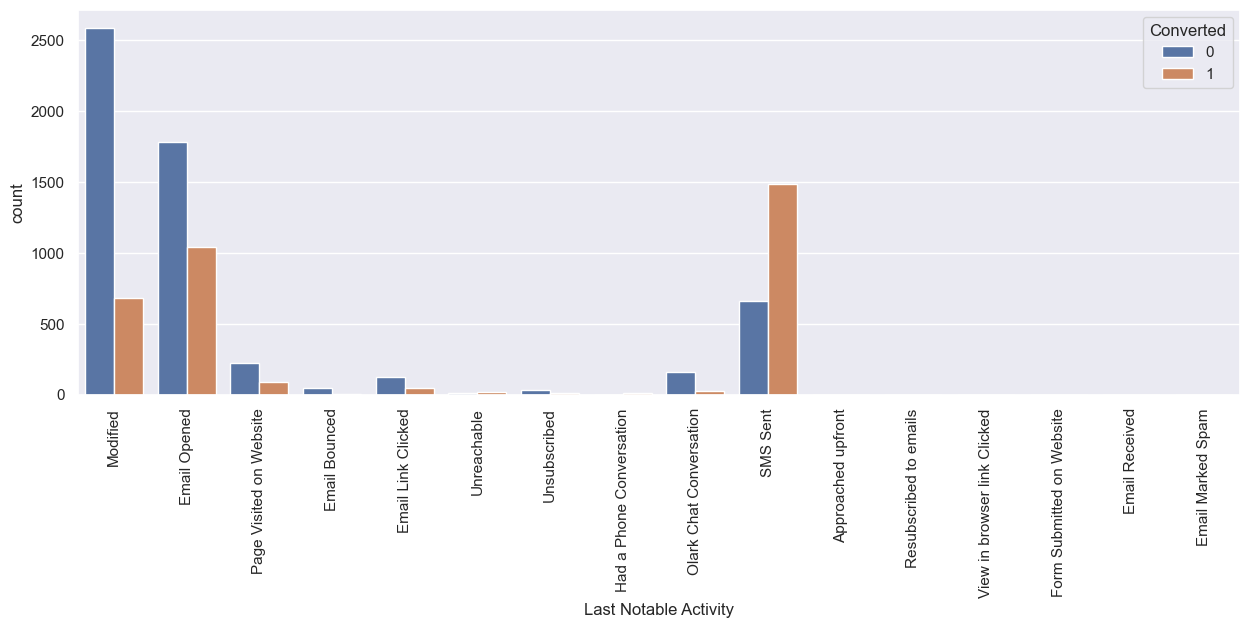

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_df)
plt.xticks(rotation = 90)
plt.show()

### Observation 

#### This column is very much similar to Last activity column

### Based on our data analysis , we conclude that many variables are not significant to the model.Hence we can drop them for further analysis

In [70]:
leads_df = leads_df.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],axis = 1)

In [71]:
leads_df.shape

(9074, 14)

## Step 4: Data Preparation

### Converting binary variables (Yes/No) to 1/0

In [72]:
# List of binary variables
varlist =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
leads_df[varlist] = leads_df[varlist].apply(binary_map)

### Create a dummy variable for the categorical variables

In [73]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(leads_df[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,Fa

In [74]:
# Combining dummy data with the original dataset

leads_df = pd.concat([leads_df, dummy_data], axis=1)
leads_df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [75]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Others']
leads_df = leads_df.drop(drop_cols, axis=1)
leads_df.head()



,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,0,0,0,5.0,674,2.5,0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,0,0,0,1.0,305,1.0,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False

In [76]:
#check the shape of dataframe
leads_df.shape

(9074, 75)

## Step 5: Train-Test Split

In [77]:
# Putting feature variable to X
X = leads_df.drop(['Converted'], axis=1)


# Putting response variable to y
y = leads_df['Converted']

In [78]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6: Feature Scaling

In [79]:
#create object of StandardScaler
scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
1012,1,0,-0.432779,-0.540048,-0.155018,0,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9226,0,0,-1.150329,-0.888650,-1.265540,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4750,0,0,-0.432779,1.643304,-0.155018,0,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,Fals

## Step 7: Feature Selection Using RFE

In [80]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=20) 
rfe = rfe.fit(X_train, y_train)

In [81]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [82]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Marked Spam', False, 9),
 ('Last Activity_Email Opened', False, 51),
 ('Last Activity_Email Received', False, 50),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Had a Phone 

In [83]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [84]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Man

## Step 9: Model Building

In [85]:
X_train = X_train.astype({'Lead Origin_Lead Add Form': 'int64', 
                          'Lead Origin_Lead Import': 'int64',
                          'Lead Source_Olark Chat': 'int64', 
                          'Lead Source_Reference': 'int64', 
                          'Lead Source_Welingak Website': 'int64', 
                          'Last Activity_Converted to Lead': 'int64', 
                          'Last Activity_Email Bounced': 'int64', 
                          'Last Activity_Had a Phone Conversation': 'int64', 
                          'Last Activity_Olark Chat Conversation': 'int64', 
                          'What is your current occupation_Housewife': 'int64', 
                          'What is your current occupation_Student': 'int64', 
                          'What is your current occupation_Unemployed': 'int64', 
                          'What is your current occupation_Working Professional': 'int64', 
                          'Last Notable Activity_Email Link Clicked': 'int64', 
                          'Last Notable Activity_Email Opened': 'int64', 
                          'Last Notable Activity_Modified': 'int64', 
                          'Last Notable Activity_Olark Chat Conversation': 'int64', 
                          'Last Notable Activity_Page Visited on Website': 'int64'})

In [86]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Sun, 23 Jun 2024   Deviance:                       5246.2
Time:                        09:51:28   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3765      0.603      2.282      0.022       0.194       2.559
Do Not Email                                            -1.6059      0.200     -8.040      0.000      -1.997      -1.214
Total Time Spent on Website                              1.1340      0.041     27.904      0.000       1.054       1.214
Lead Origin_Lead Add Form                                2.1380      0.927      2.308      0.021       0.322       3.954
Lead Origin_Lead Import                                  1.5445      0.457      3.378      0.001       0.648       2.441
Lead Source_Olark Chat                                   1.2434      0.104     11.904      0.000       1.039       1.448
Lead Source_Reference                                    1.8217      0.951      1.915      0.056      -0.043       3.686
Lead Source_Welingak Website                             3.8664      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1086      0.228     -4.857      0.000      -1.556      -0.661
Last Activity_Email Bounced                             -1.2769      0.425     -3.002      0.003      -2.111      -0.443
Last Activity_Had a Phone Conversation                   1.9240      0.783      2.458      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3307      0.191     -6.983      0.000      -1.704      -0.957
What is your current occupation_Housewife               21.6424   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7930      0.638     -1.242      0.214      -2.044       0.458
What is your current occupation_Unemployed              -1.1988      0.599     -2.001      0.045      -2.373      -0.024
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8842      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4250      0.088    -16.122      0.000      -1.598      -1.252
Last Notable Activity_Modified                          -1.7447      0.100    -17.394      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5331      0.369     -4.152      0.000      -2.257      -0.809
Last Notable Activity_Page Visited on Website           -1.6991      0.202     -8.399      0.000      -2.096      -1.303
========================================================================================================================
"""

In [87]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.09
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,4.40
17,Last Notable Activity_Modified,3.09
16,Last Notable Activity_Email Opened,2.27
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Observation
 - #### The p value for column 'What is your current occupation_Housewife' is very high and above the threshold. Hence we will drop this column from our model
    


In [88]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [89]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.0
Date:                Sun, 23 Jun 2024   Deviance:                       5249.9
Time:                        09:51:28   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8072      0.557      3.245      0.001       0.716       2.899
Do Not Email                                            -1.6087      0.200     -8.045      0.000      -2.001      -1.217
Total Time Spent on Website                              1.1329      0.041     27.899      0.000       1.053       1.213
Lead Origin_Lead Add Form                                2.1374      0.926      2.307      0.021       0.322       3.953
Lead Origin_Lead Import                                  1.5422      0.457      3.373      0.001       0.646       2.438
Lead Source_Olark Chat                                   1.2414      0.104     11.887      0.000       1.037       1.446
Lead Source_Reference                                    1.8263      0.951      1.920      0.055      -0.038       3.691
Lead Source_Welingak Website                             3.8666      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1055      0.228     -4.844      0.000      -1.553      -0.658
Last Activity_Email Bounced                             -1.2726      0.426     -2.991      0.003      -2.107      -0.439
Last Activity_Had a Phone Conversation                   1.9249      0.783      2.459      0.014       0.391       3.459
Last Activity_Olark Chat Conversation                   -1.3304      0.191     -6.976      0.000      -1.704      -0.957
What is your current occupation_Student                 -1.2238      0.595     -2.057      0.040      -2.390      -0.058
What is your current occupation_Unemployed              -1.6290      0.553     -2.946      0.003      -2.713      -0.545
What is your current occupation_Working Professional     1.1336      0.582      1.948      0.051      -0.007       2.274
Last Notable Activity_Email Link Clicked                -1.8809      0.255     -7.378      0.000      -2.381      -1.381
Last Notable Activity_Email Opened                      -1.4229      0.088    -16.103      0.000      -1.596      -1.250
Last Notable Activity_Modified                          -1.7475      0.100    -17.419      0.000      -1.944      -1.551
Last Notable Activity_Olark Chat Conversation           -1.5323      0.369     -4.150      0.000      -2.256      -0.809
Last Notable Activity_Page Visited on Website           -1.7018      0.202     -8.416      0.000      -2.098      -1.305
========================================================================================================================
"""

In [90]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.47
12,What is your current occupation_Unemployed,4.37
16,Last Notable Activity_Modified,3.08
15,Last Notable Activity_Email Opened,2.25
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Observation
 - #### The p value and VIF value for column 'Lead Source_Reference' is high and above the threshold.Hence we will drop this column
    

In [91]:
col3 = col2.drop('Lead Source_Reference',1)
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [92]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Sun, 23 Jun 2024   Deviance:                       5252.9
Time:                        09:51:29   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8104      0.556      3.254      0.001       0.720       2.901
Do Not Email                                            -1.6042      0.200     -8.036      0.000      -1.995      -1.213
Total Time Spent on Website                              1.1321      0.041     27.879      0.000       1.053       1.212
Lead Origin_Lead Add Form                                3.8941      0.222     17.525      0.000       3.459       4.330
Lead Origin_Lead Import                                  1.5407      0.457      3.370      0.001       0.645       2.437
Lead Source_Olark Chat                                   1.2385      0.104     11.854      0.000       1.034       1.443
Lead Source_Welingak Website                             2.1077      0.755      2.792      0.005       0.628       3.587
Last Activity_Converted to Lead                         -1.1061      0.228     -4.848      0.000      -1.553      -0.659
Last Activity_Email Bounced                             -1.2767      0.425     -3.001      0.003      -2.110      -0.443
Last Activity_Had a Phone Conversation                   1.9242      0.783      2.459      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3294      0.191     -6.972      0.000      -1.703      -0.956
What is your current occupation_Student                 -1.2245      0.594     -2.060      0.039      -2.389      -0.060
What is your current occupation_Unemployed              -1.6322      0.552     -2.956      0.003      -2.715      -0.550
What is your current occupation_Working Professional     1.1322      0.581      1.948      0.051      -0.007       2.271
Last Notable Activity_Email Link Clicked                -1.8768      0.255     -7.372      0.000      -2.376      -1.378
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.099      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -1.7466      0.100    -17.418      0.000      -1.943      -1.550
Last Notable Activity_Olark Chat Conversation           -1.5312      0.369     -4.148      0.000      -2.255      -0.808
Last Notable Activity_Page Visited on Website           -1.7066      0.203     -8.422      0.000      -2.104      -1.309
========================================================================================================================
"""

In [93]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.37
15,Last Notable Activity_Modified,3.08
14,Last Notable Activity_Email Opened,2.25
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.61
16,Last Notable Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.33


### Observation
 - #### The VIF value for column 'What is your current occupation_Unemployed' is high and above the threshold.Hence we will drop it

In [94]:
col4 = col3.drop('What is your current occupation_Unemployed',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [95]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2631.3
Date:                Sun, 23 Jun 2024   Deviance:                       5262.6
Time:                        09:51:29   Pearson chi2:                 6.40e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3961
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1783      0.069      2.576      0.010       0.043       0.314
Do Not Email                                            -1.5942      0.199     -8.009      0.000      -1.984      -1.204
Total Time Spent on Website                              1.1346      0.041     27.953      0.000       1.055       1.214
Lead Origin_Lead Add Form                                3.9140      0.222     17.634      0.000       3.479       4.349
Lead Origin_Lead Import                                  1.5329      0.457      3.354      0.001       0.637       2.429
Lead Source_Olark Chat                                   1.2350      0.104     11.832      0.000       1.030       1.440
Lead Source_Welingak Website                             2.0798      0.755      2.755      0.006       0.600       3.559
Last Activity_Converted to Lead                         -1.1190      0.228     -4.905      0.000      -1.566      -0.672
Last Activity_Email Bounced                             -1.2905      0.425     -3.037      0.002      -2.123      -0.458
Last Activity_Had a Phone Conversation                   1.9182      0.782      2.454      0.014       0.386       3.451
Last Activity_Olark Chat Conversation                   -1.3288      0.190     -6.978      0.000      -1.702      -0.956
What is your current occupation_Student                  0.3988      0.226      1.763      0.078      -0.044       0.842
What is your current occupation_Working Professional     2.7561      0.189     14.578      0.000       2.386       3.127
Last Notable Activity_Email Link Clicked                -1.8657      0.253     -7.362      0.000      -2.362      -1.369
Last Notable Activity_Email Opened                      -1.4120      0.088    -16.004      0.000      -1.585      -1.239
Last Notable Activity_Modified                          -1.7343      0.100    -17.330      0.000      -1.931      -1.538
Last Notable Activity_Olark Chat Conversation           -1.5295      0.369     -4.144      0.000      -2.253      -0.806
Last Notable Activity_Page Visited on Website           -1.6988      0.203     -8.373      0.000      -2.096      -1.301
========================================================================================================================
"""

In [96]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Olark Chat Conversation,1.99
14,Last Notable Activity_Modified,1.87
0,Do Not Email,1.78
7,Last Activity_Email Bounced,1.76
4,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.54
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.24
6,Last Activity_Converted to Lead,1.23


### Observation
 - #### The VIF value for column 'What is your current occupation_Student' is high and above the threshold.Hence we will drop it

In [97]:
col5 = col4.drop('What is your current occupation_Student',1)
col5

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [98]:
#BUILDING MODEL #5
X_train_sm = sm.add_constant(X_train[col5])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2632.8
Date:                Sun, 23 Jun 2024   Deviance:                       5265.6
Time:                        09:51:30   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3959
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.1829      0.069      2.646      0.008       0.047       0.318
Do Not Email                                            -1.5927      0.199     -8.002      0.000      -1.983      -1.203
Total Time Spent on Website                              1.1343      0.041     27.954      0.000       1.055       1.214
Lead Origin_Lead Add Form                                3.9204      0.222     17.674      0.000       3.486       4.355
Lead Origin_Lead Import                                  1.5214      0.457      3.330      0.001       0.626       2.417
Lead Source_Olark Chat                                   1.2364      0.104     11.843      0.000       1.032       1.441
Lead Source_Welingak Website                             2.0647      0.755      2.736      0.006       0.586       3.544
Last Activity_Converted to Lead                         -1.1169      0.228     -4.893      0.000      -1.564      -0.669
Last Activity_Email Bounced                             -1.2823      0.425     -3.017      0.003      -2.115      -0.449
Last Activity_Had a Phone Conversation                   1.9128      0.782      2.447      0.014       0.381       3.445
Last Activity_Olark Chat Conversation                   -1.3242      0.190     -6.957      0.000      -1.697      -0.951
What is your current occupation_Working Professional     2.7461      0.189     14.533      0.000       2.376       3.116
Last Notable Activity_Email Link Clicked                -1.8622      0.254     -7.345      0.000      -2.359      -1.365
Last Notable Activity_Email Opened                      -1.4026      0.088    -15.945      0.000      -1.575      -1.230
Last Notable Activity_Modified                          -1.7327      0.100    -17.320      0.000      -1.929      -1.537
Last Notable Activity_Olark Chat Conversation           -1.5183      0.369     -4.120      0.000      -2.241      -0.796
Last Notable Activity_Page Visited on Website           -1.6947      0.203     -8.357      0.000      -2.092      -1.297
========================================================================================================================
"""

In [99]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_Olark Chat Conversation,1.99
14,Last Notable Activity_Modified,1.87
0,Do Not Email,1.78
7,Last Activity_Email Bounced,1.76
4,Lead Source_Olark Chat,1.65
2,Lead Origin_Lead Add Form,1.54
15,Last Notable Activity_Olark Chat Conversation,1.33
5,Lead Source_Welingak Website,1.33
1,Total Time Spent on Website,1.24
6,Last Activity_Converted to Lead,1.23


### Observation

 - #### The VIF values of all the variables are under threshold value 3.
 - #### The p value of all variables are under threshold value 0.05.
 - #### Hence we will consider Model 5 as our final model for further analysis
    




In [100]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.197571
1012    0.363877
9226    0.210578
4750    0.885636
7987    0.676740
1281    0.772547
2880    0.098016
4971    0.912332
7536    0.868626
1248    0.635935
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.19757088, 0.36387657, 0.21057782, 0.88563556, 0.67673952,
       0.7725475 , 0.09801603, 0.91233213, 0.86862589, 0.63593451])

### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [102]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Lead_Score_Prob,Prospect ID
0,0,0.197571,3009
1,0,0.363877,1012
2,0,0.210578,9226
3,1,0.885636,4750
4,1,0.676740,7987


In [103]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.197571,3009,0
1,0,0.363877,1012,0
2,0,0.210578,9226,0
3,1,0.885636,4750,1
4,1,0.676740,7987,1


## Step 10: Model Evaluation

In [104]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3456  449]
 [ 732 1714]]


In [105]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8140450322783813


In [106]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [107]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.7

In [108]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.89

In [109]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11498079385403329


In [110]:
# positive predictive value 
print (TP / float(TP+FP))

0.7924179380490061


In [111]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8252148997134671


## Step 11: Plotting the ROC Curve


 - #### ROC shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
 - #### The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
 - #### The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [112]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [113]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

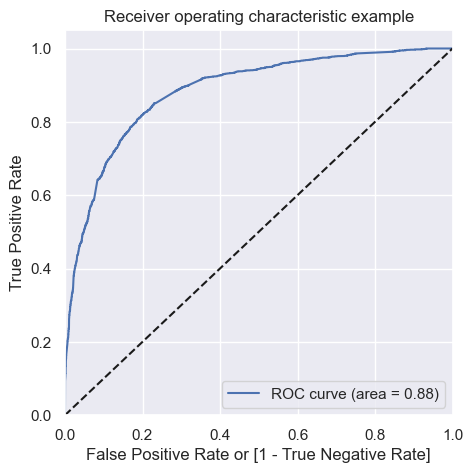

In [114]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

#### The ROC Curve should be a value close to 1. We are getting a value of 0.88 indicating a good predictive model.

## Step 12: Finding Optimal Cutoff Point

#### Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value.

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [115]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0


In [116]:
cutoff_df = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.593922     0.971382    0.357490
0.2          0.2  0.749646     0.919052    0.643534
0.3          0.3  0.801449     0.843827    0.774904
0.4          0.4  0.813730     0.771055    0.840461
0.5          0.5  0.814045     0.700736    0.885019
0.6          0.6  0.809951     0.639411    0.916773
0.7          0.7  0.780192     0.512265    0.948015
0.8          0.8  0.757833     0.418234    0.970551
0.9          0.9  0.713431     0.274325    0.988476


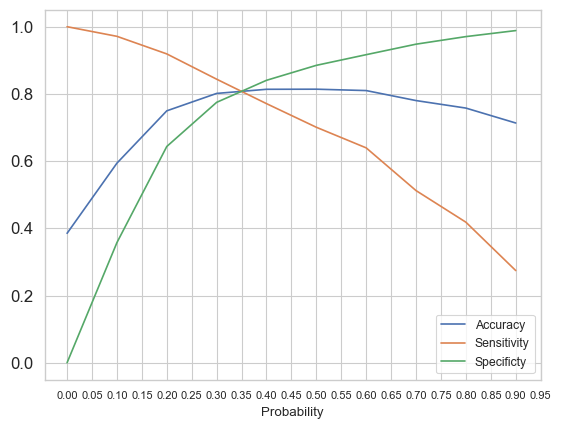

In [117]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_df.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

### Observation

#### From the above curve we can see that the optimal cutoff is at 0.35. This is the point where all the parameters - Accuracy,Sensitivity,Specificity are equally balanced

In [118]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [119]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.197571,3009,0,1,1,0,0,0,0,0,0,0,0,0,20
1,0,0.363877,1012,0,1,1,1,1,0,0,0,0,0,0,1,36
2,0,0.210578,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.885636,4750,1,1,1,1,1,1,1,1,1,1,0,1,89
4,1,0.676740,7987,1,1,1,1,1,1,1,1,0,0,0,1,68


In [120]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8096362777515352

In [121]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3161,  744],
       [ 465, 1981]], dtype=int64)

In [122]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [123]:
# Let's check the sensitivity 
TP / float(TP+FN)

0.8098937040065413

In [124]:
# Let us calculate specificity
TN / float(TN+FP)

0.8094750320102433

In [125]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.1905249679897567


In [126]:
# positive predictive value 
print (TP / float(TP+FP))

0.7269724770642202


In [127]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8717595146166575


### Observation

#### when we are selecting the optimal cutoff = 0.35, the various performance parameters Accuracy, Sensitivity & Specificity are all 80%



## Step 13: Metrics - Precision and Recall

#### To attain more stability and predict successfully in our model one needs to check two important parameters -precision and recall which tells us the score for result relevancy and how many truly relevant results are returned

In [128]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.73

In [129]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.81

In [130]:
#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7269724770642202

In [131]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098937040065413

### Observation

 - #### As per our business objective, the recall percentage is more significant since we don't want to left out any hot leads which are willing to get converted.
 - #### Hence Recall- 81% suggest a good model


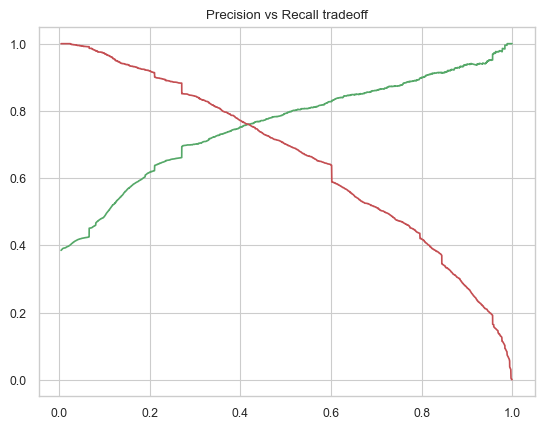

In [132]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
plt.plot(thresholds, p[:-1], "g-")    # Plotting precision
plt.plot(thresholds, r[:-1], "r-")    # Plotting Recall
plt.show()


#### As seen from above,there is tradeoff between Precision and Recall.Precision and Recall are inversely related means if one increases other will genuinely decrease. 

## Step 14: Making predictions on the test set

In [133]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [134]:
X_test = X_test[col5]

X_test.shape

(2723, 16)

In [135]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1490,0,1.887326,False,False,False,False,False,False,False,False,True,False,True,False,False,False
7936,0,-0.752879,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4216,0,-0.888650,True,False,False,False,False,False,False,False,False,False,False,True,False,False
3830,0,-0.587751,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [136]:
X_test = X_test.astype({'Lead Origin_Lead Add Form': 'int64', 
                          'Lead Origin_Lead Import': 'int64',
                          'Lead Source_Olark Chat': 'int64', 
                          'Lead Source_Welingak Website': 'int64', 
                          'Last Activity_Converted to Lead': 'int64', 
                          'Last Activity_Email Bounced': 'int64', 
                          'Last Activity_Had a Phone Conversation': 'int64', 
                          'Last Activity_Olark Chat Conversation': 'int64', 
                          'Last Notable Activity_Email Link Clicked': 'int64', 
                          'Last Notable Activity_Email Opened': 'int64', 
                          'Last Notable Activity_Modified': 'int64', 
                          'Last Notable Activity_Olark Chat Conversation': 'int64', 
                          'Last Notable Activity_Page Visited on Website': 'int64',
                          'Total Time Spent on Website' : 'int64',
                          'What is your current occupation_Working Professional' : 'int64'})

In [137]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [138]:
print(X_test.dtypes)

Do Not Email                                            int64
Total Time Spent on Website                             int64
Lead Origin_Lead Add Form                               int64
Lead Origin_Lead Import                                 int64
Lead Source_Olark Chat                                  int64
Lead Source_Welingak Website                            int64
Last Activity_Converted to Lead                         int64
Last Activity_Email Bounced                             int64
Last Activity_Had a Phone Conversation                  int64
Last Activity_Olark Chat Conversation                   int64
What is your current occupation_Working Professional    int64
Last Notable Activity_Email Link Clicked                int64
Last Notable Activity_Email Opened                      int64
Last Notable Activity_Modified                          int64
Last Notable Activity_Olark Chat Conversation           int64
Last Notable Activity_Page Visited on Website           int64
dtype: o

In [139]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [140]:
y_test_pred[:10]

3271    0.227978
1490    0.934666
7936    0.227978
4216    0.914555
3830    0.227978
1800    0.821470
6507    0.545588
4821    0.227978
4223    0.983749
4714    0.422280
dtype: float64

In [141]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.227978
1490,0.934666
7936,0.227978
4216,0.914555
3830,0.227978


In [142]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [143]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [144]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [145]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [146]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.227978
1,1,1490,0.934666
2,0,7936,0.227978
3,1,4216,0.914555
4,0,3830,0.227978


In [147]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [148]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [149]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [150]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.227978,23
1,1490,1,0.934666,93
2,7936,0,0.227978,23
3,4216,1,0.914555,91
4,3830,0,0.227978,23


In [151]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [152]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.227978,23,0
1,1490,1,0.934666,93,1
2,7936,0,0.227978,23,0
3,4216,1,0.914555,91,1
4,3830,0,0.227978,23,0


In [153]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
1055,2674,1,0.998941,100,1,Hot Lead
21,2461,1,0.997909,100,1,Hot Lead
23,5822,1,0.998941,100,1,Hot Lead
1439,4772,1,0.998941,100,1,Hot Lead
25,2684,1,0.998941,100,1,Hot Lead
...,...,...,...,...,...,...
1707,8152,0,0.011836,1,0,Cold Lead
1632,5156,0,0.011836,1,0,Cold Lead
870,7426,0,0.011836,1,0,Cold Lead
2367,4883,0,0.011836,1,0,Cold Lead


In [154]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7451340433345575

In [155]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1221,  513],
       [ 181,  808]], dtype=int64)

In [156]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [157]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8169868554095046

In [158]:
# Let us calculate specificity
TN / float(TN+FP)

0.7041522491349481

In [159]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.6116578349735049

In [160]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8169868554095046

### Final Observation:
#### Lets compare the  Model Performance parameters oobtained for Train & Test data:

 - #### Train Data: 
#### Accuracy : 80.96%
#### Sensitivity : 80.98%
#### Specificity : 80.94%
#### Precision : 72.69%
#### Recall : 80.98%



 - #### Test Data: 
#### Accuracy : 74.51%
#### Sensitivity : 81.69%
#### Specificity : 70.41%
#### Precision : 61.16%
#### Recall : 81.69%



### Observation 


 - #### We got around 1% difference on train and test data's performance metrics.This implies that our final model didn't overfit training data and is performing well.

 - #### High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.

 - #### Depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model.

### Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [161]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.59
Total Time Spent on Website                             1.13
Lead Origin_Lead Add Form                               3.92
Lead Origin_Lead Import                                 1.52
Lead Source_Olark Chat                                  1.24
Lead Source_Welingak Website                            2.06
Last Activity_Converted to Lead                        -1.12
Last Activity_Email Bounced                            -1.28
Last Activity_Had a Phone Conversation                  1.91
Last Activity_Olark Chat Conversation                  -1.32
What is your current occupation_Working Professional    2.75
Last Notable Activity_Email Link Clicked               -1.86
Last Notable Activity_Email Opened                     -1.40
Last Notable Activity_Modified                         -1.73
Last Notable Activity_Olark Chat Conversation          -1.52
Last Notable Activity_Page Visited on Website          -1.69
dtype: float64

In [162]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient


feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -40.63
Total Time Spent on Website                             28.93
Lead Origin_Lead Add Form                              100.00
Lead Origin_Lead Import                                 38.81
Lead Source_Olark Chat                                  31.54
Lead Source_Welingak Website                            52.67
Last Activity_Converted to Lead                        -28.49
Last Activity_Email Bounced                            -32.71
Last Activity_Had a Phone Conversation                  48.79
Last Activity_Olark Chat Conversation                  -33.78
What is your current occupation_Working Professional    70.05
Last Notable Activity_Email Link Clicked               -47.50
Last Notable Activity_Email Opened                     -35.78
Last Notable Activity_Modified                         -44.20
Last Notable Activity_Olark Chat Conversation          -38.73
Last Notable Activity_Page Visited on Website          -43.23
dtype: f

In [163]:
##Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Total Time Spent on Website                             13
Lead Origin_Lead Add Form                               15
Lead Origin_Lead Import                                  0
Lead Source_Olark Chat                                  14
Lead Source_Welingak Website                            12
Last Activity_Converted to Lead                          9
Last Activity_Email Bounced                              7
Last Activity_Had a Phone Conversation                   6
Last Activity_Olark Chat Conversation                    1
What is your current occupation_Working Professional     4
Last Notable Activity_Email Link Clicked                 3
Last Notable Activity_Email Opened                       8
Last Notable Activity_Modified                           5
Last Notable Activity_Olark Chat Conversation           10
Last Notable Activity_Page Visited on Website            2
dtype: int64

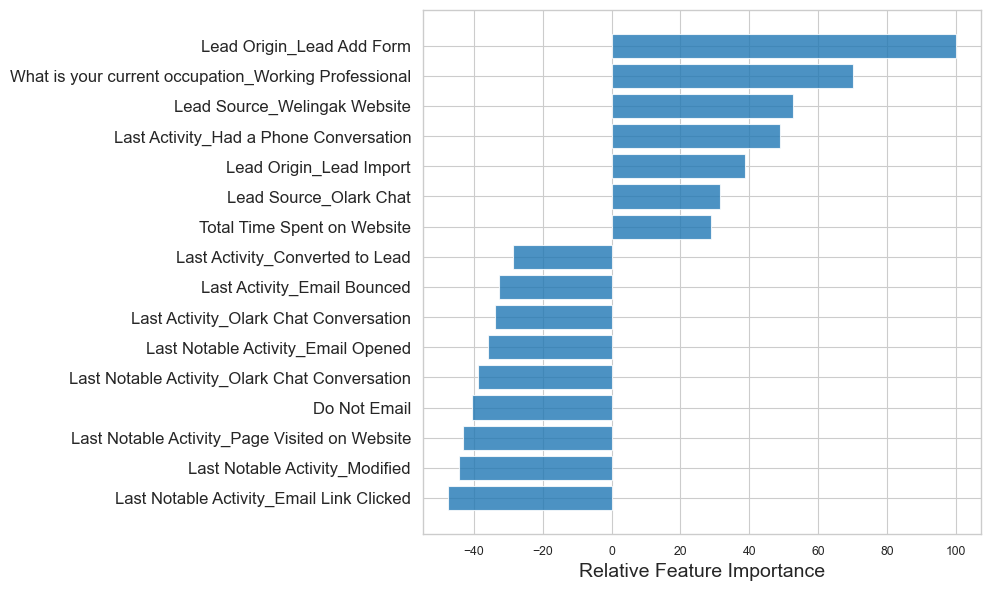

In [164]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col5].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Final Model Reporting & Equation-

#### log odds is given by: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn
    

#### log odds = 0.18 +(-1.59 * Do Not Email) + (1.13 * Total Time Spent on Website) + (3.92 * Lead Origin_Lead Add Form) + (1.52 * Lead Origin_Lead Import) + (1.24 * Lead Source_Olark Chat) + (2.06 * Lead Source_Welingak website) + (-1.12 * Last Activity_Converted to Lead) + (-1.28 * Last Activity_Email Bounced) + (1.91 * Last Activity_Had a Phone Conversation) + (-1.32 * Last Activity_Olark Chat Conversation) + (2.75 * What is your current occupation_Working Professional) + (-1.86 * Last Notable Activity_Email Link Clicked) + (-1.40 * Last Notable Activity_Email Opened) + (-1.73 * Last Notable Activity_Modified) + (-1.52* Last Notable Activity_Olark Chat Conversation) + (-1.69 * Last Notable Activity_Page Visited on Website ) 

### <u> Recommendations -

 - #### The sales team of the X-Education should focus on the leads having lead origin - lead add form , occupation - Working Professional , Lead source - Wellingak website.
 - #### Hot Leads are identified as 'Customers having lead score above 35. Sales Team of the company should first focus on the 'Hot Leads'
 - #### The 'Cold Leads'(Customer having lead score <= 35) should be focused after the Sales Team is done with the 'Hot Leads'.
 - #### There are many important variables like city, specialization , occupation which can potentially explain Conversion better.It is important for the management to make few of these information mandatory to fill , so that we can use in our model and build important decisions for the business.
 - #### We have high recall score than precision score. Hence this model has an ability to adjust with the company’s requirements in coming future.
 - #### High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected.
 - #### It’s better to focus least on customers who do not want to be called about the course.
 - #### If the Last Notable Activity is Modified, he/she may not be the potential lead.